In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import glob
import os
import random
import datetime
import re
import json

sys.path.append("../src")

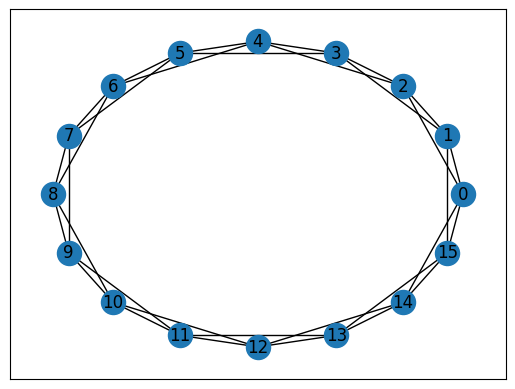

In [2]:
from gentopo.topology.families import families
lattice_graph = families.lattice(16, 4)

nx.draw_networkx(lattice_graph, nx.circular_layout(lattice_graph))

[3, 4, 5, 5, 4, 5, 5, 5, 3, 4, 4, 3, 3, 3, 3, 5]
0.6313811020591442


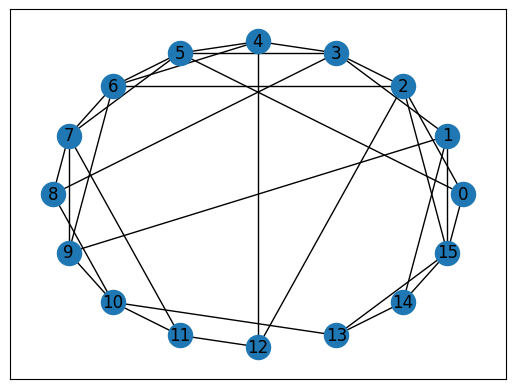

In [9]:
insufficient = True
while insufficient:    
    graph = families.connected_small_world(16, 4, 0.5, 5)
    degrees = [deg for (node, deg) in graph.degree()]
    omega = nx.omega(graph)
    conditions = {
        "degree": [min(degrees), max(degrees)] == [3, 5],
        "omega": 0.25 <= omega <= 0.75,
    }

    if all(conditions.values()):
        small_world_graph = graph
        insufficient = False

print(degrees)
print(omega)

nx.draw_networkx(small_world_graph, nx.circular_layout(small_world_graph))

In [10]:
graph = small_world_graph
degrees = [deg for (node, deg) in graph.degree()]
print(len(graph.edges))
print(degrees)

import random
from itertools import chain
rounds = 5
dyads = [(u,v) for (u,v) in graph.edges]
print(nx.omega(graph))
interaction_sequence = []

# This is 8 for n = 16
ideal_matching_size = round(len(graph.nodes()) / 2)
tries = 1000 * ideal_matching_size
tries_since_ideal_matching = 0

print(f"Total available dyads: {len(dyads)}")

while tries:
    
    matching = set()
    matching.add(random.choice(dyads))

    nodes_in_matching = set(chain(*matching))

    for dyad in dyads:
        u,v = dyad
        if u not in nodes_in_matching and v not in nodes_in_matching:
            matching.add((u,v))
            nodes_in_matching.update({u,v})

    if len(matching) == ideal_matching_size:
        interaction_sequence.append(matching)
        print("Matching added to sequence")
        for matched in matching:
            dyads.remove(matched)
        print(f"{len(dyads)} remain for matching")
        if len(interaction_sequence) == rounds:
            break
    
    if tries_since_ideal_matching > 1000:
        ideal_matching_size -= 1
        print(f"new ideal matching size: {ideal_matching_size}")
        tries_since_ideal_matching = 0
    
    tries -= 1
    tries_since_ideal_matching += 1

print(f"Interaction sequence for {rounds} rounds found:")
interaction_sequence


32
[3, 4, 5, 5, 4, 5, 5, 5, 3, 4, 4, 3, 3, 3, 3, 5]
0.583769063180828
Total available dyads: 32
Matching added to sequence
24 remain for matching
new ideal matching size: 7
Matching added to sequence
17 remain for matching
Matching added to sequence
10 remain for matching
new ideal matching size: 6
Matching added to sequence
4 remain for matching
new ideal matching size: 5
new ideal matching size: 4
Matching added to sequence
0 remain for matching
Interaction sequence for 5 rounds found:


[{(0, 2), (1, 15), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14)},
 {(0, 5), (1, 3), (2, 12), (4, 6), (7, 9), (8, 10), (13, 15)},
 {(0, 15), (1, 9), (2, 6), (3, 5), (4, 12), (7, 11), (10, 13)},
 {(1, 14), (2, 15), (3, 8), (4, 5), (6, 7), (10, 11)},
 {(2, 3), (5, 7), (6, 9), (14, 15)}]

In [11]:
nx.average_shortest_path_length(graph)

1.9833333333333334

In [12]:
nx.average_clustering(graph)

0.20625

In [13]:
len(interaction_sequence)

5